In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# from: https://github.com/chrismeller/StarbucksLocations
df = pd.read_csv('stores.csv')

In [4]:
df.columns

Index([u'Id', u'StarbucksId', u'Name', u'BrandName', u'StoreNumber',
       u'PhoneNumber', u'OwnershipType', u'Street1', u'Street2', u'Street3',
       u'City', u'CountrySubdivisionCode', u'CountryCode', u'PostalCode',
       u'Longitude', u'Latitude', u'TimezoneOffset', u'TimezoneId',
       u'TimezoneOlsonId', u'FirstSeen', u'LastSeen'],
      dtype='object')

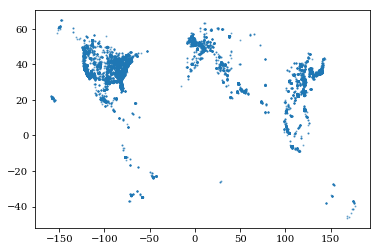

In [5]:
plt.scatter(df['Longitude'], df['Latitude'], s=4, alpha=0.5, marker='.')

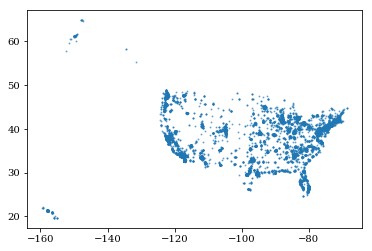

In [6]:
usa = df['CountryCode'] == 'US'

plt.scatter(df['Longitude'][usa], df['Latitude'][usa], s=4, alpha=0.5, marker='.')

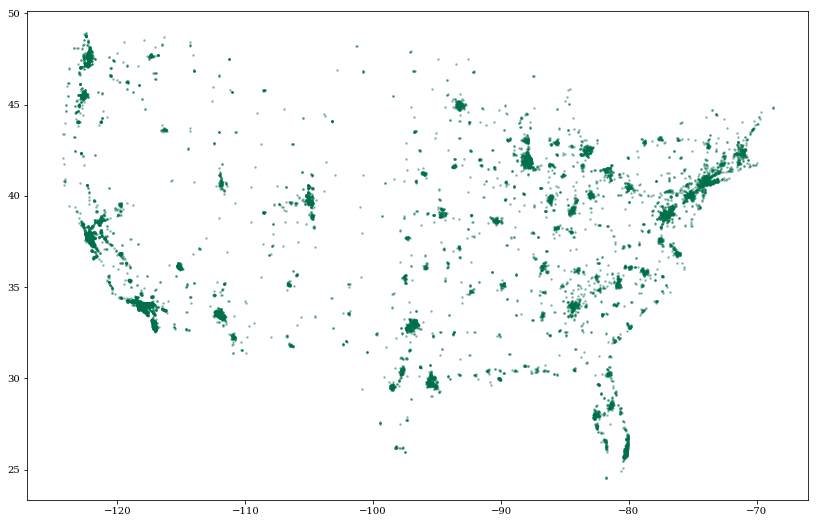

In [7]:
usa48 = (df['CountryCode'] == 'US') & (df['Longitude'] > -130) & (df['Latitude'] < 50)

plt.figure(figsize=(14,9))
plt.scatter(df['Longitude'][usa48], df['Latitude'][usa48], s=10, alpha=0.35, marker='.', c='#00704a')
plt.savefig('usa_sbux.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

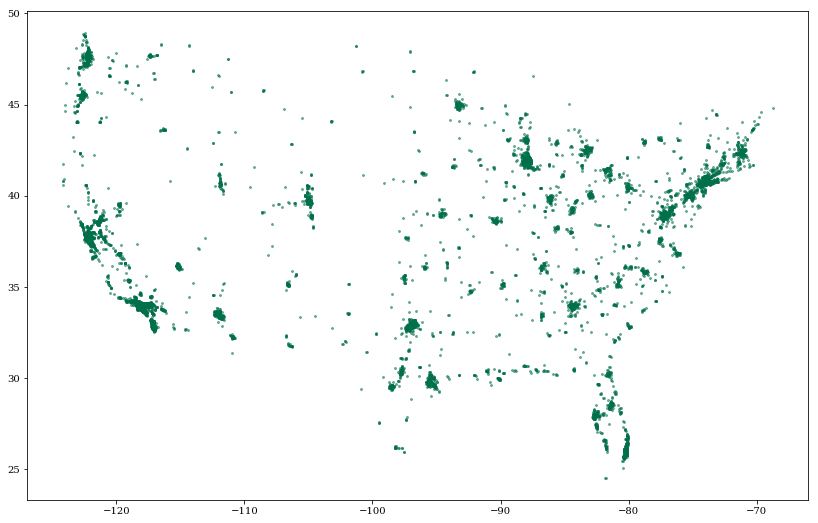

In [8]:
usa48co = (df['CountryCode'] == 'US') & (df['Longitude'] > -130) & (df['Latitude'] < 50) & (df[u'OwnershipType'] == 'CO')

plt.figure(figsize=(14,9))
plt.scatter(df['Longitude'][usa48co], df['Latitude'][usa48co], 
            s=15, alpha=0.5, marker='.', c='#00704a')
plt.savefig('usa_sbux_CO.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

## Now for QHULL!

In [9]:
from scipy.spatial import Delaunay

In [10]:
points = np.vstack((df['Longitude'][usa48co], df['Latitude'][usa48co])).T
tri = Delaunay(points)

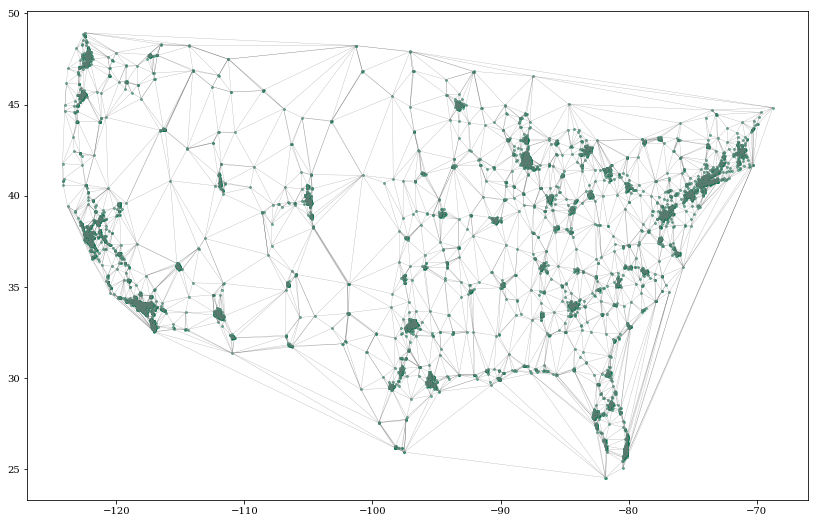

In [11]:
plt.figure(figsize=(14,9))
plt.scatter(df['Longitude'][usa48co], df['Latitude'][usa48co], 
            s=15, alpha=0.5, marker='.', c='#00704a')
plt.triplot(df['Longitude'][usa48co], df['Latitude'][usa48co], tri.simplices.copy(), 
            c='grey', alpha=0.7, lw=0.3)
plt.savefig('usa_sbux_CO_delaunay.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [12]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [13]:
vor = Voronoi(points)
vor.close()

/Users/james/anaconda/lib/python2.7/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


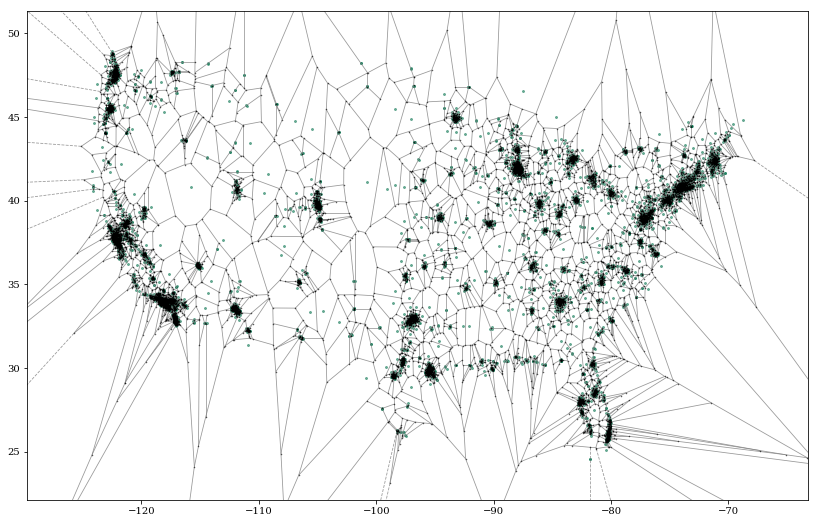

In [14]:
fig,ax = plt.subplots(figsize=(14, 9))
plt.scatter(df['Longitude'][usa48co], df['Latitude'][usa48co], 
            s=15, alpha=0.5, marker='.', c='#00704a')

f2=voronoi_plot_2d(vor, ax=ax, show_vertices=False, show_points=False, 
                   line_colors='grey', line_width=0.8, line_alpha=0.8)

ax.plot(vor.vertices[:,0], vor.vertices[:,1], 
        '.', c='k', markersize=1, alpha=0.7)
plt.savefig('usa_sbux_CO_vor.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [15]:
vor.vertices.shape

(13914, 2)

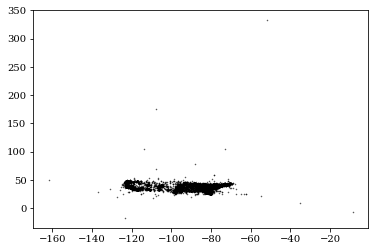

In [16]:
plt.plot(vor.vertices[:,0], vor.vertices[:,1], 
        '.', c='k', markersize=1, alpha=0.7)

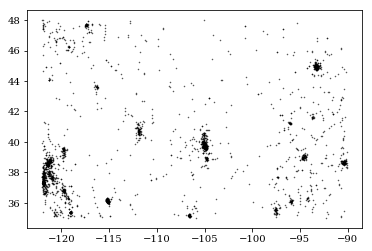

In [32]:
rng = [-122, -90, 35, 48]
vclose = np.where((vor.vertices[:,1] < rng[3]) & (vor.vertices[:,1] > rng[2]) & 
                  (vor.vertices[:,0] > rng[0]) & (vor.vertices[:,0] < rng[1]))[0]

plt.plot(vor.vertices[:,0][vclose], vor.vertices[:,1][vclose], 
        '.', c='k', markersize=1, alpha=0.7)

In [33]:
vdist = np.zeros(vclose.size)
for k in range(vclose.size):
    vdist[k] = np.nanmin(np.sqrt((vor.vertices[:,0][vclose][k] - vor.points[:,0])**2 + 
                                 (vor.vertices[:,1][vclose][k] - vor.points[:,1])**2))
ss = np.argsort(vdist)[::-1]

[257.52636528]
[105.04552042]W [47.98570487]N


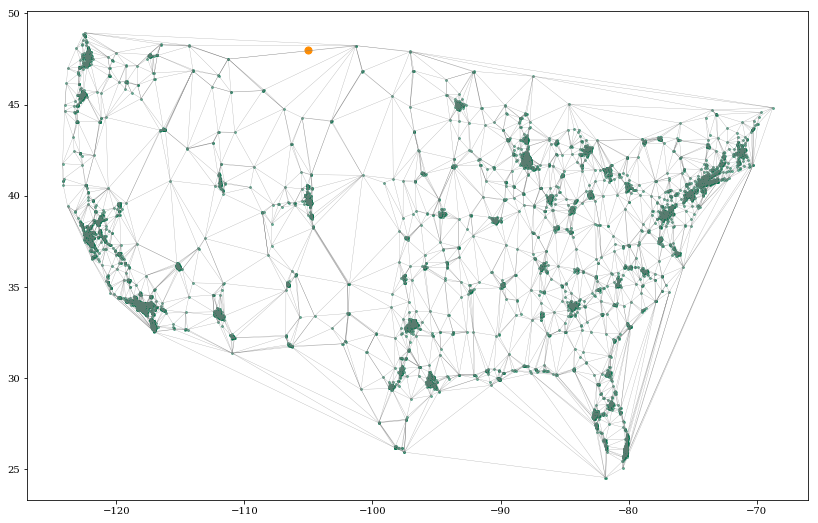

In [36]:
i = [0]

print(vdist[ss[i]] * 69)

fig,ax = plt.subplots(figsize=(14, 9))
plt.scatter(df['Longitude'][usa48co], df['Latitude'][usa48co], 
            s=15, alpha=0.5, marker='.', c='#00704a')
plt.triplot(df['Longitude'][usa48co], df['Latitude'][usa48co], tri.simplices.copy(), 
            c='grey', alpha=0.7, lw=0.3)
# f2=voronoi_plot_2d(vor, ax=ax, show_vertices=False, show_points=False, 
#                    line_colors='grey', line_width=0.8, line_alpha=0.8)

# plt.plot(vor.vertices[:,0], vor.vertices[:,1], 
#         '.', c='k', markersize=1, alpha=0.2)

plt.scatter(vor.vertices[:,0][vclose][ss[i]], vor.vertices[:,1][vclose][ss[i]], 
            color='DarkOrange', s=50)

print(str(-vor.vertices[:,0][vclose][ss[i]])+'W ' + str(vor.vertices[:,1][vclose][ss[i]])+'N')

plt.savefig('usa_sbux_CO_lowest.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [37]:
points2 = np.vstack((df['Longitude'][usa48], df['Latitude'][usa48])).T

vor2 = Voronoi(points2)
tri2 = Delaunay(points2)

# vclose2 = np.where((vor2.vertices[:,1] < 47) & (vor2.vertices[:,1] > 35) & 
#                    (vor2.vertices[:,0] > -122) & (vor2.vertices[:,0] < -90))[0]
vclose2 = np.where((vor2.vertices[:,1] < rng[3]) & (vor2.vertices[:,1] > rng[2]) & 
                   (vor2.vertices[:,0] > rng[0]) & (vor2.vertices[:,0] < rng[1]))[0]



vdist2 = np.zeros(vclose2.size)
for k in range(vclose2.size):
    vdist2[k] = np.nanmin(np.sqrt((vor2.vertices[:,0][vclose2][k] - vor2.points[:,0])**2 + 
                                  (vor2.vertices[:,1][vclose2][k] - vor2.points[:,1])**2))


227.90801561881506
105.93608762409W 47.916754864328276N


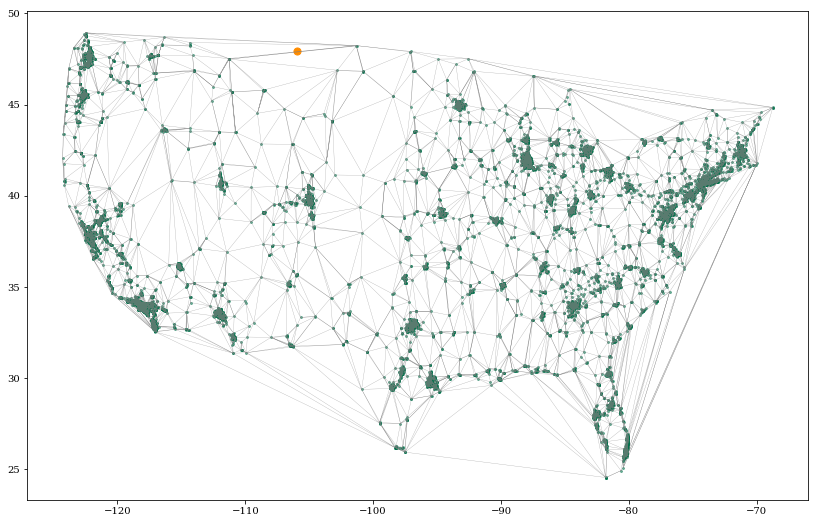

In [38]:
ss = np.argsort(vdist2)[::-1]
i = 0
print(vdist2[ss][i] * 69)

fig,ax = plt.subplots(figsize=(14, 9))
plt.scatter(df['Longitude'][usa48], df['Latitude'][usa48], 
            s=15, alpha=0.5, marker='.', c='#00704a')
plt.triplot(df['Longitude'][usa48], df['Latitude'][usa48], tri2.simplices.copy(), 
            c='grey', alpha=0.7, lw=0.3)

# plt.plot(vor.vertices[:,0], vor.vertices[:,1], 
#         '.', c='k', markersize=1, alpha=0.2)

plt.scatter(vor2.vertices[:,0][vclose2][ss][i], vor2.vertices[:,1][vclose2][ss][i], 
            color='DarkOrange', s=50)

print(str(-vor2.vertices[:,0][vclose2][ss][i])+'W ' + str(vor2.vertices[:,1][vclose2][ss][i])+'N')

plt.savefig('usa_sbux_lowest.png', dpi=300, bbox_inches='tight', pad_inches=0.25)